# Data & Apprentissage, M2CHPS 2023

## Assignments - Part 2

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Assignments2.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Assignments1.ipynb).

## 0. Before you start

* This assignement has already few exercises and  will be completed 2 weeks before the final deadline. You can start working on them and get any update as you go.
* Work on the assignment either alone or in a team of two (pair). Students that will work alone will benefit from a 15% bonus. Important: The point in working in a pair is not to split the work, but to collaborate! 
* Prepare **a single jupiter notebook** in a report-like format for all the exercises. Use this notebook as a starting point and place your answers just below each exercise. Describe properly what you do in each step of your solution, followed by your well-commented code implementation that can automatically produce figures and numerical results. Results should also be well-commented and discussed. Your comments can be either in English or in French.
* If you need to provide mathematical expressions, incorporate all that in your notebook in a latex form (not handwritten!). 
* Important: send your notebook that includes all your work and any additional files you used (e.g. datasets) at by email, with a title ``M2CHPS <year> - <Surname1> & <Surname2>``. The title of the notebook should have the surnames of the students. The body of the email should also mention the students' names and how they split the work; if you face difficulties in clarifying this with your classmate, please write separate emails with your views. 
* Always use references for things you reuse (e.g. internet, forums, books, published papers, etc.)
* Do not copy-paste from the internet recipies that do the asked thing (or what is most usually observed: to use something relevant but not exactly what is asked). You need to understand what you use (sources should be properly referenced), adapt it to what each exercise asks for, and comment clearly the results. Poorly commented and explained pieces of work/code will not be taken seriously into account. 
* Copying from one another is not acceptable. We are strict with that: cheating in even one exercise will incur **a zero to all projects** (not just one assignement) and possible disqualification from the exams. Your work will be cross-checked against anything similar submitted from past students of the course.
* The assignments will be examined orally at the end of the semester. Each group of students should be able to explain in about 10 mins all what they did, and answer short questions.
* **Deadline: midnight of Sunday 1/12.**
* **Late submissions:** the maximum possible grade is penalized by 5%/day. E.g. when delivering on time the best grade is 20/20, late submission by one day gets at best 19/20, for two days late of delay 18/20...  
* **Slot for questions: Friday 15/11 at 14h**. Zoom link: https://kalogeratos.com/zoom. Meeting ID: 243 940 6970 -- Passcode: 15881598

## Exercise 1 [15%]

A security system relies on a battery ($b$), two sensors ($c$ and $d$), and an alarm ($a$). The random variables $a$, $b$, $c$ are binary, and $a=1$ when the alarm fires, $b=1$ when the battery functions properly, and $c=1$ and $d=1$ when the respective sensor functions properly. Otherwise, each variable takes the value $0$.

The architecture of the system is as follows: the battery provides power with independent cables to the two sensors, and the sensors feed information to the alarm that can then fire to signify a threat. Each sensor can operate even with only its internal power source that it is equipped with, but in that case it becomes much more sensitive to fail compared to when the external battery is functioning normally. 

The manual of the system says that the probability for the battery to fail is 0.1, and that each sensor fails with probability 0.01 when the battery is ok, and with 0.7 when the battery is not ok. 

Additionally, the manual also informs us that if at least one sensor works fine, then the alarm fires with probability 0.02. Otherwise the alarm fires with 30 times higher probability.

**a)** Draw the graphical model of the system involving the random variables.

**b)** Compute the joint probabilities $p(a,b,c,d)$ and $p(a,c)$. Also check if $c$ and $d$ are independent.

**c)** Suppose **the alarm is silent** and that we check that **only the sensor $d$ works properly**. What is the posterior of having a disfunctioning battery?

**d)** Compute the probability for the alarm to be silent, $p(a=0)$.

**e)** We know that when at least one sensor works fine then the alarm fires with 0.02 (which let's suppose it is as much as as it is normal), otherwise with 0.6. We want to know how many sensors should the system have (connected like $c$ and $d$ in the initial design) such that the total probability $p(a=1) < 0.05$.

**f)** Suppose **we don't hear any alarm** (with good ears!) and **we have no information about the sensors** functioning. What is the probability for the battery to be disfunctioning?

**g)** Implement a function that generates observations from the probabilistic model at the top. Then make simulations to confirm empirically the estimations you calculated by hand.

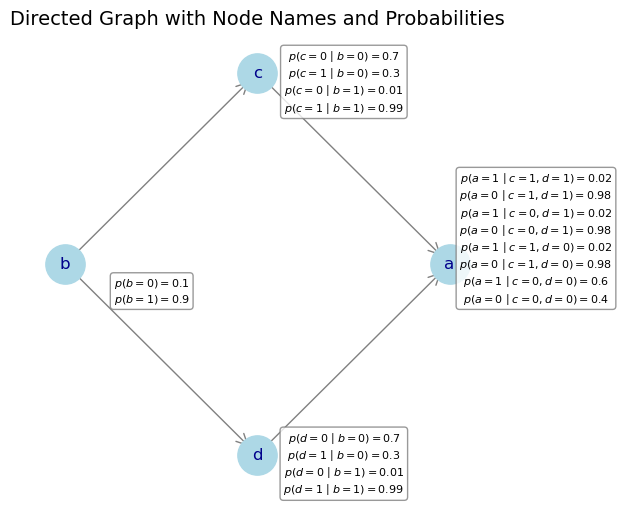

In [27]:
# (a) Graphical model:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(['a', 'b', 'c', 'd'])

# Add directed edges to represent dependencies between nodes
G.add_edges_from([
    ('b', 'c'),  # b influences c
    ('b', 'd'),  # b influences d
    ('c', 'a'),  # c influences a
    ('d', 'a')   # d influences a
])

# Define node names (to be used as labels in the plot)
node_names = {node: node for node in G.nodes()}

# Define the probabilities and conditions associated with each node
probabilities = {
    'a': (
        r'$p(a=1 \mid c=1,d=1) = 0.02$' + '\n' +
        r'$p(a=0 \mid c=1,d=1) = 0.98$' + '\n' +
        r'$p(a=1 \mid c=0,d=1) = 0.02$' + '\n' +
        r'$p(a=0 \mid c=0,d=1) = 0.98$' + '\n' +
        r'$p(a=1 \mid c=1,d=0) = 0.02$' + '\n' +
        r'$p(a=0 \mid c=1,d=0) = 0.98$' + '\n' +
        r'$p(a=1 \mid c=0, d=0) = 0.6$' + '\n' +
        r'$p(a=0 \mid c=0, d=0) = 0.4$'
    ),
    'b': r'$p(b=0) = 0.1$' + '\n' + r'$p(b=1) = 0.9$',
    'c': (
        r'$p(c=0 \mid b=0) = 0.7$' + '\n' +
        r'$p(c=1 \mid b=0) = 0.3$' + '\n' +
        r'$p(c=0 \mid b=1) = 0.01$' + '\n' +
        r'$p(c=1 \mid b=1) = 0.99$'
    ),
    'd': (
        r'$p(d=0 \mid b=0) = 0.7$' + '\n' +
        r'$p(d=1 \mid b=0) = 0.3$' + '\n' +
        r'$p(d=0 \mid b=1) = 0.01$' + '\n' +
        r'$p(d=1 \mid b=1) = 0.99$'
    )
}

# Define node positions for the graph
pos = {
    'a': (2, 1),   # Position of node 'a'
    'b': (-2, 1),  # Position of node 'b'
    'c': (0, 2),   # Position of node 'c'
    'd': (0, 0)    # Position of node 'd'
}

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Draw the nodes of the graph
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')

# Draw the directed edges with arrow styles
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20, edge_color='gray')

# Add labels to the nodes
nx.draw_networkx_labels(G, pos, labels=node_names, font_size=12, font_color='darkblue')

# Add probability annotations next to each node
for node, (x, y) in pos.items():
    plt.text(
        x + 0.9, y - 0.2,  # Offset for placing the text near the node
        probabilities[node],  # Probability strings defined earlier
        fontsize=8,           # Font size for the annotations
        color='black',        # Text color
        ha='center',          # Horizontal alignment of text
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)  # Text box styling
    )

# Set title for the graph
plt.title("Directed Graph with Node Names and Probabilities", fontsize=14)

# Turn off axis display for cleaner visualization
plt.axis('off')

# Display the plot
plt.show()


**(b)** Calculate probabilities:

***(b1)*** Check the independence of $c$ and $d$:
$$
p(c,d \mid b) = \frac{p(c,d,b)}{p(b)} = \frac{p(c \mid b) \times p(d \mid b) \times p(b)}{p(b)} = p(c \mid b) \times p(d \mid b)
$$
$c$ and $d$ are independent with a given value of $b$.

***(b2)*** We firstly compute $p(c)$ from the joint probability $p(b,c)$, as $p(c)=p(c \mid b=0) + p(c \mid b=1)$ and $p(b,c) = p(c \mid b) \times p(b)$:
$$
\begin{aligned}
p(c=0,b=0) &= p(c=0 \mid b=0) \times p(b=0) = 0.7 \times 0.1 = 0.07 \\
p(c=0,b=1) &= p(c=0 \mid b=1) \times p(b=1) = 0.01 \times 0.9 = 0.009 \\
p(c=1,b=0) &= p(c=1 \mid b=0) \times p(b=0) = (1-p(c=0 \mid b=0)) \times p(b=0) = (1-0.7) \times 0.1 = 0.03 \\
p(c=1,b=1) &= p(c=1 \mid b=1) \times p(b=1) = (1-p(c=0 \mid b=1)) \times p(b=1) = (1-0.01) \times 0.9 = 0.891 \\
p(c=0) &= p(c=0,b=0) + p(c=0,b=1) = 0.07 + 0.009 = 0.079 \\
p(c=1) &= p(c=1,b=0) + p(c=1,b=1) = 0.03 + 0.891 = 0.921
\end{aligned}
$$

As $d$ has the same behavior as $c$, we can easily obtain $p(d)$:
$$
\begin{aligned}
p(d=0 \mid b=0) &= p(c=0 \mid b=0) = 0.7 \\
p(d=0 \mid b=1) &= p(c=0 \mid b=1) = 0.01 \\
p(d=1 \mid b=0) &= p(c=1 \mid b=0) = 1 - 0.7 = 0.3 \\
p(d=1 \mid b=1) &= p(c=1 \mid b=1) = 1 - 0.01 = 0.99 \\
p(d=0,b=0) &= p(c=0,b=0) = 0.07 \\
p(d=0,b=1) &= p(c=0,b=1) = 0.009 \\
p(d=1,b=0) &= p(c=1,b=0) = 0.03 \\
p(d=1,b=1) &= p(c=1,b=1) = 0.891 \\
p(d=0) &= p(c=0) = 0.079 \\
p(d=1) &= p(c=1) = 0.921
\end{aligned}
$$

***(b3)*** We have: 
$$
p(a,b,c,d) = p(a \mid c,d,b) \times p(c,d,b) = p(a \mid c,d) \times p(c,d,b)
$$ 
because $a$ does not directly rely on $b$. 

With independence of $c$ and $d$: 
$$
p(c,d,b) = p(c,d \mid b) \times p(b) = p(c \mid b) \times p(d \mid b) \times p(b)
$$

Then we have:
$$
p(a,b,c,d) = p(a \mid c,d) \times p(c \mid b) \times p(d \mid b) \times p(b)
$$

Thus,
$$
\begin{aligned}
p(a=1,b=0,c=0,d=0) &= p(a=1 \mid c=0,d=0) \times p(c=0 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.6 \times 0.7 \times 0.7 \times 0.1 = 0.0294 \\
p(a=0,b=0,c=0,d=0) &= p(a=0 \mid c=0,d=0) \times p(c=0 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.4 \times 0.7 \times 0.7 \times 0.1 = 0.0196 \\
p(a=1,b=1,c=0,d=0) &= p(a=1 \mid c=0,d=0) \times p(c=0 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.6 \times 0.01 \times 0.01 \times 0.9 = 0.000054 \\
p(a=0,b=1,c=0,d=0) &= p(a=0 \mid c=0,d=0) \times p(c=0 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.4 \times 0.01 \times 0.01 \times 0.9 = 0.000036 \\
p(a=1,b=0,c=1,d=0) &= p(a=1 \mid c=1,d=0) \times p(c=1 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.02 \times 0.3 \times 0.7 \times 0.1 = 0.00042 \\
p(a=0,b=0,c=1,d=0) &= p(a=0 \mid c=1,d=0) \times p(c=1 \mid b=0) \times p(d=0 \mid b=0) \times p(b=0) \\
&= 0.98 \times 0.3 \times 0.7 \times 0.1 = 0.02058 \\
p(a=1,b=1,c=1,d=0) &= p(a=1 \mid c=1,d=0) \times p(c=1 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.02 \times 0.99 \times 0.01 \times 0.9 = 0.0001782 \\
p(a=0,b=1,c=1,d=0) &= p(a=0 \mid c=1,d=0) \times p(c=1 \mid b=1) \times p(d=0 \mid b=1) \times p(b=1) \\
&= 0.98 \times 0.99 \times 0.01 \times 0.9 = 0.0087318 \\
p(a=1,b=0,c=1,d=1) &= p(a=1 \mid c=1,d=1) \times p(c=1 \mid b=0) \times p(d=1 \mid b=0) \times p(b=0) \\
&= 0.02 \times 0.3 \times 0.3 \times 0.1 = 0.00018 \\
p(a=0,b=0,c=1,d=1) &= p(a=0 \mid c=1,d=1) \times p(c=1 \mid b=0) \times p(d=1 \mid b=0) \times p(b=0) \\
&= 0.98 \times 0.3 \times 0.3 \times 0.1 = 0.00882 \\
p(a=1,b=1,c=1,d=1) &= p(a=1 \mid c=1,d=1) \times p(c=1 \mid b=1) \times p(d=1 \mid b=1) \times p(b=1) \\
&= 0.02 \times 0.99 \times 0.99 \times 0.9 = 0.0176418 \\
p(a=0,b=1,c=1,d=1) &= p(a=0 \mid c=1,d=1) \times p(c=1 \mid b=1) \times p(d=1 \mid b=1) \times p(b=1) \\
&= 0.98 \times 0.99 \times 0.99 \times 0.9 = 0.8644482 \\
p(a=1,b=0,c=0,d=1) &= p(a=1 \mid c=0,d=1) \times p(c=0 \mid b=0) \times p(d=1 \mid b=0) \times p(b=0) \\
&= 0.02 \times 0.7 \times 0.3 \times 0.1 = 0.00042 \\
p(a=0,b=0,c=0,d=1) &= p(a=0 \mid c=0,d=1) \times p(c=0 \mid b=0) \times p(d=1 \mid b=0) \times p(b=0) \\
&= 0.98 \times 0.7 \times 0.3 \times 0.1 = 0.02058 \\
p(a=1,b=1,c=0,d=1) &= p(a=1 \mid c=0,d=1) \times p(c=0 \mid b=1) \times p(d=1 \mid b=1) \times p(b=1) \\
&= 0.02 \times 0.01 \times 0.99 \times 0.9 = 0.0001782 \\
p(a=0,b=1,c=0,d=1) &= p(a=0 \mid c=0,d=1) \times p(c=0 \mid b=1) \times p(d=1 \mid b=1) \times p(b=1) \\
&= 0.98 \times 0.01 \times 0.99 \times 0.9 = 0.0087318 
\end{aligned}
$$

***(b3)*** Then we calculate $p(a,c)$:

$$
\begin{aligned}
p(a,c) &= \sum_{b=0}^1 \sum_{d=0}^1 p(a,b,c,d) \\
p(a=0,c=0) &= p(a=0,b=0,c=0,d=0) + p(a=0,b=1,c=0,d=0) + p(a=0,b=0,c=0,d=1) + p(a=0,b=1,c=0,d=1) \\
&= 0.0196 + 0.000036 + 0.02058 + 0.0087318 = 0.0489478 \\
p(a=1,c=0) &= p(a=1,b=0,c=0,d=0) + p(a=1,b=1,c=0,d=0) + p(a=1,b=0,c=0,d=1) + p(a=1,b=1,c=0,d=1) \\
&= 0.0294 + 0.000054 + 0.00042 + 0.0001782 = 0.0300522 \\
p(a=0,c=1) &= p(a=0,b=0,c=1,d=0) + p(a=0,b=1,c=1,d=0) + p(a=0,b=0,c=1,d=1) + p(a=0,b=1,c=1,d=1) \\
&= 0.02058 + 0.0087318 + 0.00882 + 0.8644482 = 0.90258 \\
p(a=1,c=1) &= p(a=1,b=0,c=1,d=0) + p(a=1,b=1,c=1,d=0) + p(a=1,b=0,c=1,d=1) + p(a=1,b=1,c=1,d=1) \\
&= 0.00042 + 0.0001782 + 0.00018 + 0.0176418 = 0.01842 \\
\end{aligned}
$$

**(c)** We can apply the Bayes' Theorem and then use the calculated values from question (b): 

$$
\begin{aligned}
p(b=0 \mid a=0,c=0,d=1) &= \frac{p(b=0) \times p(a=0,c=0,d=1 \mid b=0)}{p(a=0,c=0,d=1)} \\
&= \frac{p(b=0) \times p(a=0,c=0,d=1,b=0)}{p(a=0,c=0,d=1) \times p(b=0)} \\
&= \frac{p(a=0,c=0,d=1,b=0)}{p(a=0,c=0,d=1)} \\
&= \frac{p(a=0,c=0,d=1,b=0)}{p(a=0,c=0,d=1,b=0) + p(a=0,c=0,d=1,b=1)} \\
&= \frac{0.02058}{0.02058 + 0.0087318} = \frac{0.02058}{0.0293118} \approx 0.702106
\end{aligned}
$$ 

**(d)**

$$
\begin{aligned}
p(a=0) &= \sum_{c=0}^1 p(a=0,c) \\
&= p(a=0,c=0) + p(a=0,c=1) \\
&= 0.0489478 + 0.90258 = 0.9515278
\end{aligned}
$$

**(e)** Suppose that the system has $N$ sensors satisfying $p(a=1) < 0.05$. Since the sensors are linked parallelly like $c$ and $d$ in the previous model, we assume that they are independent.

$$
\begin{aligned}
p(a=1) &= p(a=1, \text{no sensor works}) + p(a=1, \text{at least one sensor works}) \\
&= p(a=1 \mid \text{no sensor works}) \times p(\text{no sensor works}) + p(a=1 \mid \text{at least one sensor works}) \times p(\text{at least one sensor works}) \\
&= 0.6 \times \prod_{i=1}^N p(c=0) + 0.02 \times (1- \prod_{i=1}^N p(c=0)) \\
&= 0.6 \times 0.079^N + 0.02 \times (1 - 0.079^N) \\
&= 0.02 + 0.58 \times 0.079^N < 0.05 \\
0.079^N &< 0.051724 \\
N \ln{0.079} &< \ln{0.051724} \\
N &> \frac{\ln{0.051724}}{\ln{0.079}} \approx 1.16
\end{aligned}
$$

As $N$ is an integer, we take $N = 2$.

**(f)**

$$
\begin{aligned}
p(b=0 \mid a=0) &= \frac{p(a=0,b=0)}{p(a=0)} \\
&= \frac{\sum_c \sum_d p(a=0,b=0,c,d)}{p(a=0)} \\
&= \frac{p(a=0,b=0,c=0,d=0) + p(a=0,b=0,c=1,d=0) + p(a=0,b=0,c=1,d=1) + p(a=0,b=0,c=0,d=1)}{p(a=0)} \\
&=\frac{0.0196 + 0.02058 + 0.00882 + 0.02058}{0.9515278} \approx 0.0731245
\end{aligned}
$$

In [77]:
# (g) probabilistic simulation
import numpy as np

# Function to generate a single observation based on the probabilistic model
def generate_observation():
    # Step 1: Determine battery status (b)
    b = np.random.choice([1, 0], p=[0.9, 0.1])
    
    # Step 2: Determine sensor status (c and d) based on battery status
    if b == 1:  # Battery is functioning
        c = np.random.choice([1, 0], p=[0.99, 0.01])
        d = np.random.choice([1, 0], p=[0.99, 0.01])
    else:  # Battery is not functioning
        c = np.random.choice([1, 0], p=[0.3, 0.7])
        d = np.random.choice([1, 0], p=[0.3, 0.7])
    
    # Step 3: Determine alarm status (a) based on sensor statuses
    if c == 0 and d == 0:  # Both sensors are not working
        a = np.random.choice([1, 0], p=[0.6, 0.4])
    else:  # At least one sensor works
        a = np.random.choice([1, 0], p=[0.02, 0.98])
    
    return a, b, c, d

# Simulate a large number of observations
def simulate_observations(num_samples):
    observations = [generate_observation() for _ in range(num_samples)]
    return np.array(observations)

# Simulate 100000 samples
num_samples = 100000
simulated_data = simulate_observations(num_samples)

# Calculate empirical probabilities

# P(a=0):
prob_a_0 = np.mean(simulated_data[:, 0] == 0) 
# P(a=1):
prob_a_1 = np.mean(simulated_data[:, 0] == 1) 
# P(b=0 | a=0):
prob_b_0_given_a_0 = np.mean((simulated_data[:, 1] == 0) & (simulated_data[:, 0] == 0)) / prob_a_0
# P(a=1, b=0, c=0, d=0):
prob_a1_b0_c0_d0 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 0)
)
# P(a=0, b=0, c=0, d=0):
prob_a0_b0_c0_d0 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 0)
)
# P(a=1, b=1, c=0, d=0):
prob_a1_b1_c0_d0 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 0)
)
# P(a=0, b=1, c=0, d=0):
prob_a0_b1_c0_d0 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 0)
)
# P(a=1, b=0, c=1, d=0):
prob_a1_b0_c1_d0 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 0)
)
# P(a=0, b=0, c=1, d=0):
prob_a0_b0_c1_d0 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 0)
)
# P(a=1, b=1, c=1, d=0):
prob_a1_b1_c1_d0 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 0)
)
# P(a=0, b=1, c=1, d=0):
prob_a0_b1_c1_d0 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 0)
)
# P(a=1, b=0, c=0, d=1):
prob_a1_b0_c0_d1 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
)
# P(a=0, b=0, c=0, d=1):
prob_a0_b0_c0_d1 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
)
# P(a=1, b=1, c=0, d=1):
prob_a1_b1_c0_d1 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
)
# P(a=0, b=1, c=0, d=1):
prob_a0_b1_c0_d1 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
)
# P(a=1, b=0, c=1, d=1):
prob_a1_b0_c1_d1 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 1)
)
# P(a=0, b=0, c=1, d=1):
prob_a0_b0_c1_d1 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 1)
)
# P(a=1, b=1, c=1, d=1):
prob_a1_b1_c1_d1 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 1)
)
# P(a=0, b=1, c=1, d=1):
prob_a0_b1_c1_d1 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 1] == 1) & 
    (simulated_data[:, 2] == 1) & 
    (simulated_data[:, 3] == 1)
)
# P(a=0, c=1):
prob_a0_c1 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 2] == 1)
)
# P(a=0, c=0):
prob_a0_c0 = np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 2] == 0)
)
# P(a=1, c=1):
prob_a1_c1 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 2] == 1)
)
# P(a=1, c=0):
prob_a1_c0 = np.mean(
    (simulated_data[:, 0] == 1) & 
    (simulated_data[:, 2] == 0)
)
# P(b=0 | a=0, c=0, d=1):
prob_b0_given_a0_c0_d1 = np.mean(
    (simulated_data[:, 1] == 0) & 
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
) / np.mean(
    (simulated_data[:, 0] == 0) & 
    (simulated_data[:, 2] == 0) & 
    (simulated_data[:, 3] == 1)
)

# Print results
print(f"Empirical probabilities: ")
print(f"P(a=0): {prob_a_0:.5f}")
print(f"P(a=1): {prob_a_1:.5f}")
print(f"P(b=0 | a=0): {prob_b_0_given_a_0:.5f}")

print(f"P(a=1, b=0, c=0, d=0): {prob_a1_b0_c0_d0:.5f}")
print(f"P(a=0, b=0, c=0, d=0): {prob_a0_b0_c0_d0:.5f}")
print(f"P(a=1, b=1, c=0, d=0): {prob_a1_b1_c0_d0:.5f}")
print(f"P(a=0, b=1, c=0, d=0): {prob_a0_b1_c0_d0:.5f}")
print(f"P(a=1, b=0, c=1, d=0): {prob_a1_b0_c1_d0:.5f}")
print(f"P(a=0, b=0, c=1, d=0): {prob_a1_b0_c1_d0:.5f}")
print(f"P(a=1, b=1, c=1, d=0): {prob_a1_b1_c1_d0:.5f}")
print(f"P(a=0, b=1, c=1, d=0): {prob_a0_b1_c1_d0:.5f}")
print(f"P(a=1, b=0, c=0, d=1): {prob_a1_b0_c0_d1:.5f}")
print(f"P(a=0, b=0, c=0, d=1): {prob_a0_b0_c0_d1:.5f}")
print(f"P(a=1, b=1, c=0, d=1): {prob_a1_b1_c0_d1:.5f}")
print(f"P(a=0, b=1, c=0, d=1): {prob_a0_b1_c0_d1:.5f}")
print(f"P(a=1, b=0, c=1, d=1): {prob_a1_b0_c1_d1:.5f}")
print(f"P(a=0, b=0, c=1, d=1): {prob_a0_b0_c1_d1:.5f}")
print(f"P(a=1, b=1, c=1, d=1): {prob_a1_b1_c1_d1:.5f}")
print(f"P(a=0, b=1, c=1, d=1): {prob_a0_b1_c1_d1:.5f}")

print(f"P(a=0, c=1): {prob_a0_c1:.5f}")
print(f"P(a=0, c=0): {prob_a0_c0:.5f}")
print(f"P(a=1, c=1): {prob_a1_c1:.5f}")
print(f"P(a=1, c=0): {prob_a1_c0:.5f}")

print(f"P(b=0 | a=0, c=0, d=1): {prob_b0_given_a0_c0_d1:.5f}")


Empirical probabilities: 
P(a=0): 0.95108
P(a=1): 0.04892
P(b=0 | a=0): 0.07301
P(a=1, b=0, c=0, d=0): 0.02945
P(a=0, b=0, c=0, d=0): 0.01927
P(a=1, b=1, c=0, d=0): 0.00008
P(a=0, b=1, c=0, d=0): 0.00001
P(a=1, b=0, c=1, d=0): 0.00051
P(a=0, b=0, c=1, d=0): 0.00051
P(a=1, b=1, c=1, d=0): 0.00021
P(a=0, b=1, c=1, d=0): 0.00868
P(a=1, b=0, c=0, d=1): 0.00041
P(a=0, b=0, c=0, d=1): 0.02044
P(a=1, b=1, c=0, d=1): 0.00012
P(a=0, b=1, c=0, d=1): 0.00865
P(a=1, b=0, c=1, d=1): 0.00026
P(a=0, b=0, c=1, d=1): 0.00879
P(a=1, b=1, c=1, d=1): 0.01788
P(a=0, b=1, c=1, d=1): 0.86430
P(a=0, c=1): 0.90271
P(a=0, c=0): 0.04837
P(a=1, c=1): 0.01886
P(a=1, c=0): 0.03006
P(b=0 | a=0, c=0, d=1): 0.70265


## Exercise 2 - [30%]

**Isolation Forests (IF)** are efficient in identifying global outliers. IF can provide with an outlier index for each datapoint included in a given dataset; let that be denoted by **IF_index**. 

On the other hand, [**Local Outlier Factor (LOF)**](https://en.wikipedia.org/wiki/Local_outlier_factor) identifies efficiently local outliers, although it's computationally demanding for large datasets, and is theoretically weaker as dimensions grow larger due to relying on density-based calculations (recall the *curse of dimensionality*). Before giving the questions of the exercise, let's see the details of computing LOF (see the updated Lab3 file for technical explanations about how to compute LOF in practice).

For this exercise you are asked the following:

**a)** Implement your own version of LOF and demonstrate a comparison with the built-in version of scikit-learn using the example we saw in the lab. Plot in a meaningful way the differences between the LOF index you compute for each point and what the built-in version gives. (note: since there are different LOF variants, there is the possibility that your correct implementation may give slightly different index values, but this is ok).

**b)** Investigate and propose a way to combine LOF with IF. More specifically, a way to introduce to the computations of the LOF method the IF_index we mentioned at the top of the description. 

**c)** Provide a meaningful demonstration with several examples that compare LOF, IF, and the hybrid LOF+IF.

**References:**
M.M. Breunig et al. [LOF: Identifying Density-Based Local Outliers](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf), Proc. ACM SIGMOD Int. Conf. On Management of Data, 2000.

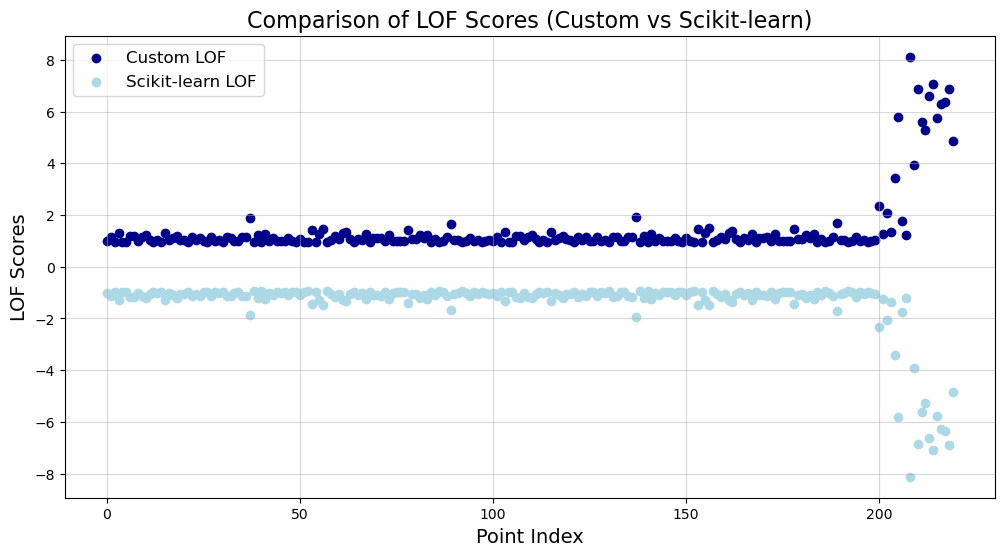

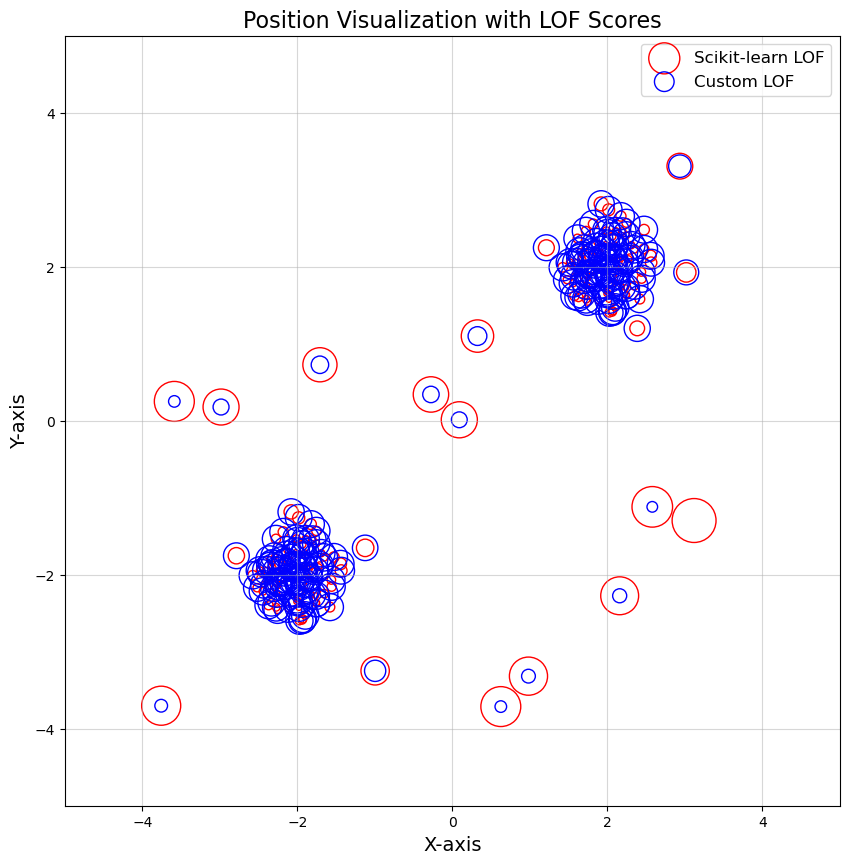

Mean difference between custom LOF and sklearn LOF: 2.8307829607951183
Max difference: 16.235815604055063


In [85]:
# (a) LOF implement using data set from lab3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor

# Custom implementation of the LOF algorithm
def custom_lof(X, n_neighbors=20):
    # Step 1: Fit the nearest neighbors model and find distances and indices
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Exclude the point itself (distance to itself is zero)
    k_distances = distances[:, 1:]  # K-distances (excluding itself)
    neighbors = indices[:, 1:]  # Indices of K-neighbors (excluding itself)

    # Step 2: Compute the reachability distance for each point
    reach_dist_array = np.zeros_like(k_distances)
    for i in range(len(X)):  # Iterate over each point
        for j in range(n_neighbors):  # Iterate over its neighbors
            neighbor_idx = neighbors[i, j]
            # Reachability distance is max(k-distance of point and its neighbor)
            reach_dist_array[i, j] = max(k_distances[i, j], k_distances[neighbor_idx, -1])

    # Step 3: Calculate the Local Reachability Density (LRD)
    lrd = n_neighbors / np.sum(reach_dist_array, axis=1)

    # Step 4: Compute the LOF score for each point
    lof_scores = np.zeros_like(lrd)
    for i in range(len(X)):  # Iterate over each point
        lof_scores[i] = np.sum(lrd[neighbors[i]] / lrd[i]) / n_neighbors

    return lof_scores

# Generate synthetic data for demonstration
np.random.seed(42)

# Generate inlier data (two Gaussian clusters)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]  # Shift the two clusters

# Generate outlier data (uniformly distributed points)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]  # Combine inliers and outliers

# Scikit-learn LOF implementation
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_sklearn = clf.fit_predict(X)  # Outlier prediction
lof_scores_sklearn = clf.negative_outlier_factor_  # Negative LOF scores

# Custom LOF implementation
lof_scores_custom = custom_lof(X, n_neighbors=20)

# Normalize scores for size visualization
radius_sklearn = (lof_scores_sklearn.max() - lof_scores_sklearn) / (
    lof_scores_sklearn.max() - lof_scores_sklearn.min()
)
radius_custom = (lof_scores_custom.max() - lof_scores_custom) / (
    lof_scores_custom.max() - lof_scores_custom.min()
)

# Plot 1: Comparison of LOF scores (value scatter plot)
plt.figure(figsize=(12, 6))
plt.title("Comparison of LOF Scores (Custom vs Scikit-learn)", fontsize=16)

# Scatter plot for LOF scores
plt.scatter(range(len(X)), lof_scores_custom, color='darkblue', label='Custom LOF')
plt.scatter(range(len(X)), lof_scores_sklearn, color='lightblue', label='Scikit-learn LOF')
plt.xlabel("Point Index", fontsize=14)
plt.ylabel("LOF Scores", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Plot 2: Position-based visualization (size-based scatter plot)
plt.figure(figsize=(10, 10))
plt.title("Position Visualization with LOF Scores", fontsize=16)

# Scatter plot for Scikit-learn LOF scores
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius_sklearn,
    edgecolors="r",
    facecolors="none",
    label="Scikit-learn LOF",
)

# Scatter plot for Custom LOF scores
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=400 * radius_custom,
    edgecolors="b",
    facecolors="none",
    label="Custom LOF",
)

plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

# Evaluate and print the differences between custom and sklearn LOF scores
diff = np.abs(lof_scores_sklearn - lof_scores_custom)
print("Mean difference between custom LOF and sklearn LOF:", np.mean(diff))
print("Max difference:", np.max(diff))


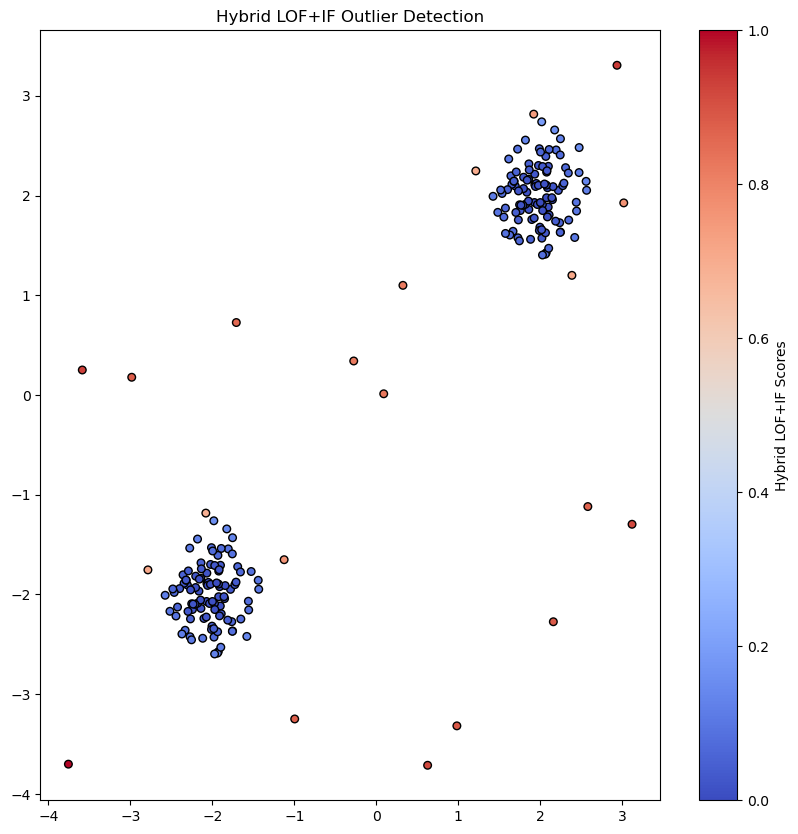

In [30]:
# (b) LOF + IF
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

def hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5):
    # Step 1: Compute IF Index
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(X)
    if_scores = -isolation_forest.decision_function(X)  # IF Index (higher means more abnormal)
    if_scores = MinMaxScaler().fit_transform(if_scores.reshape(-1, 1)).flatten()  # Normalize to [0, 1]
    
    # Step 2: Compute LOF Scores
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    lof_scores = -lof.fit_predict(X)  # Negative LOF scores (higher means more abnormal)
    lof_scores = MinMaxScaler().fit_transform(lof_scores.reshape(-1, 1)).flatten()  # Normalize to [0, 1]
    
    # Step 3: Combine Scores
    hybrid_scores = alpha * lof_scores + (1 - alpha) * if_scores
    
    return if_scores, lof_scores, hybrid_scores

# Example usage with synthetic data
np.random.seed(42)

# Generate synthetic dataset
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Compute hybrid LOF + IF scores
if_scores, lof_scores, hybrid_scores = hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5)

# Visualize results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=hybrid_scores, cmap='coolwarm', s=30, edgecolors='k')
plt.colorbar(label="Hybrid LOF+IF Scores")
plt.title("Hybrid LOF+IF Outlier Detection")
plt.show()


KeyboardInterrupt: 

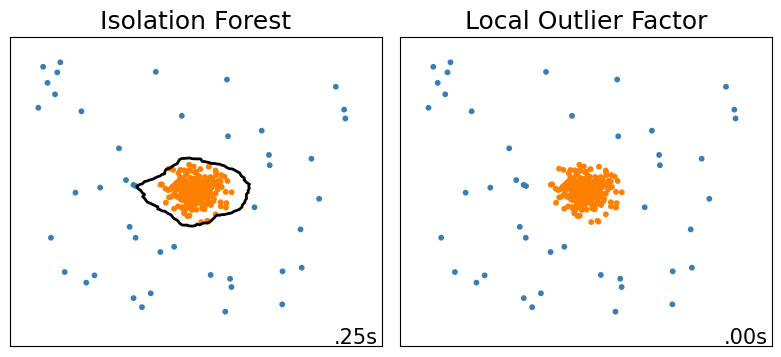

In [74]:
# (c) Demonstration with similar method in lab3
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'  # Set contour line style for negative levels

# Example settings for dataset generation
n_samples = 300  # Total number of samples
outliers_fraction = 0.15  # Fraction of outliers in the data
n_outliers = int(outliers_fraction * n_samples)  # Number of outliers
n_inliers = n_samples - n_outliers  # Number of inliers (non-outliers)

# Define hybrid method (combination of Isolation Forest and Local Outlier Factor)
def hybrid_lof_if(X, n_neighbors=20, contamination=0.1, alpha=0.5):
    # Import necessary models inside the function for encapsulation
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.ensemble import IsolationForest

    # Isolation Forest (IF) for outlier detection
    isolation_forest = IsolationForest(contamination=contamination, random_state=42)
    isolation_forest.fit(X)
    if_scores = -isolation_forest.decision_function(X)  # Negative scores, higher scores indicate more outlierness
    if_scores = MinMaxScaler().fit_transform(if_scores.reshape(-1, 1)).flatten()  # Scale scores to [0, 1]

    # Local Outlier Factor (LOF) for outlier detection
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    lof_scores = -lof.fit_predict(X)  # LOF returns -1 for outliers and 1 for inliers
    lof_scores = MinMaxScaler().fit_transform(lof_scores.reshape(-1, 1)).flatten()  # Scale scores to [0, 1]

    # Combine the scores from both methods
    hybrid_scores = alpha * lof_scores + (1 - alpha) * if_scores  # Weighted sum of both scores

    # Determine threshold dynamically for outlier detection (85th percentile)
    threshold = np.percentile(hybrid_scores, 85)  # Outliers are considered top 15%
    y_pred = np.where(hybrid_scores >= threshold, -1, 1)  # Predict outliers (-1) or inliers (1)
    return y_pred, hybrid_scores

# Define datasets (make_blobs creates isotropic Gaussian blobs, make_moons generates crescent-shaped data)
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],  # Dataset 1: 2 clusters at origin
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],  # Dataset 2: 2 clusters at (2, 2) and (-2, -2)
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],  # Dataset 3: Different spread for the clusters
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])),  # Dataset 4: Transformed moons
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]  # Dataset 5: Uniformly distributed points in a square

# Comparison of IF, LOF, and Hybrid methods on different datasets
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))  # Grid for decision boundary visualization

# Create a figure with multiple subplots for each dataset and method comparison
plt.figure(figsize=(12, len(datasets) * 4))  # Set the size of the figure
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.3)

plot_num = 1  # For subplot numbering
rng = np.random.RandomState(42)  # Random number generator for outlier placement

# Define methods for outlier detection
methods = [
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, random_state=42)),  # Isolation Forest
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)),  # Local Outlier Factor
    ("Hybrid LOF+IF", None)  # Placeholder for custom hybrid method (LOF + IF)
]

# Loop over datasets to apply each outlier detection method
for i_dataset, X in enumerate(datasets):
    # Add outliers to the dataset by concatenating random points in the range [-6, 6]
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    # Loop over the methods for outlier detection
    for name, algorithm in methods:
        t0 = time.time()  # Record start time for timing the method execution
        
        if name == "Hybrid LOF+IF":
            # Use the custom hybrid method for LOF + Isolation Forest
            y_pred, hybrid_scores = hybrid_lof_if(
                X, n_neighbors=35, contamination=outliers_fraction, alpha=0.5
            )
            # Compute decision boundary for the grid points
            grid_scores = []
            for point in np.c_[xx.ravel(), yy.ravel()]:
                _, scores = hybrid_lof_if(
                    np.vstack([X, point]),  # Add grid point to dataset
                    n_neighbors=35,
                    contamination=outliers_fraction,
                    alpha=0.5,
                )
                grid_scores.append(scores[-1])  # Last score corresponds to grid point
            Z = np.array(grid_scores).reshape(xx.shape)  # Reshape scores to grid shape
        elif name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)  # Apply LOF
            Z = None  # LOF doesn't provide a decision function
        else:
            y_pred = algorithm.fit(X).predict(X)  # Apply Isolation Forest
            Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Get decision function for grid points

        t1 = time.time()  # Record end time for timing the method execution

        # Plotting each method's results
        plt.subplot(len(datasets), len(methods), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)  # Add title for the first row

        # Plot the decision boundary if available (for methods that provide it)
        if Z is not None:
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        # Plot results (scatter plot of inliers and outliers)
        colors = np.array(['#377eb8', '#ff7f00'])  # Blue for inliers, orange for outliers
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])  # Map predictions to colors

        # Adjust plot limits and ticks
        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')  # Display the execution time
        plot_num += 1  # Increment subplot number

plt.show()  


## Exercise 3 - [45%]

As opposed to bottom-up clustering approaches, a top-down method starts with one cluster -a model with one component- and tries incrementally to increase the number of clusters by introducing and fitting more components in the model. The general algorithm goes as follows:

* **Initialization:** start with $k$=1 component model, $M_k$
* **Step 1:** fit the model $M_k$
* **Step 2:** find a good way to introduce and initialize a new component; set $k=k+1$ and go to Step 1 

There are many ways to make more specific the steps of this process. 

**Model:** one can pick a cluster model, e.g. a centroid-based like that of k-means, or a probabilistic model like the Gaussian Mixture Models (GMM). In both cases an iterative approach takes place when fitting such a model.

**Incremental step:** Most importantly, one needs to decide about how Step 2 operates. Indicative options originally expressed using $k$-means are:
* **Bisecting:** This approach chooses one cluster and splits it in two parts. The criterion of which cluster to pick varies; one simple way is to choose the cluster with the largest error (or average error). In the case of k-means, which uses a hard assignment of points to clusters, this is:
  
    - B1) Initialize a second centroid using a random point of the cluster.   
    - B2) Run a 2-means inside the cluster using only the points of that cluster.     
    - B3) (Optionally) A full k-means fine-tuning to update all the $k+1$ clusters can be performed.     
    Note that, if step B3 is not involved, 2 of the centroids are the product of the cluster splitting, while the rest come untouched from the previous $k$-order solution.
* **Global:** In its greedy version (see if needed the reference), this approach examines as the ($k+1$)-th centroid every of the $N$ points of the dataset, and in each case it fits a different $k+1$ model with ($k+1$)-means. Out of all the $N$ trials, it chooses the model that produced the maximal reduction of the clustering error (in fact it doesn't need to store the models, but only to rerun the best case found).
* **Fast Global:** It is a variation of Global k-means that initializes the $k+1$-th centroid with the point that achieves the largest reduction of error only after one k-means update, i.e. after considering it as new centroid and looking which other points would be assigned to that new cluster, and without iterating further till convergence.
* **Global++:** Instead of checking all $N$ points as candidates for initializing the $k+1$-th centroid, here the k-means++ principle is used. Specifically, the $k+1$ centroid is initialized by choosing at random one point based on the distribution of the inverse sum of distances of each point to the $k$ computed centroids. This should be repeated $m<N$ times (where $m$ is a parameter, e.g. $m=\lfloor 0.1*N \rfloor$) and pick the best choice.

**Recipe to prepare**

Consider that the final number of clusters $k^*$ is known in each case. First, use $k$-means as base algorithm, then extend to GMM as described below.

**a)** Implement the greedy global incremental, the fast global, and the global++ variations.

**b)** Which property of the solution produced by the bisecting variation does not hold any more, when including Step B3 and after applying it? Compare with the global incremental approach with regards to the same property?

**c)** Run experiments for the color clustering application we saw in the course (with given $k^*$ as in that example).

**d)** Construct a random synthetic dataset as follows. Consider a 5-by-5 2D grid arrangement of 25 clusters: i.e. the mean of the 1st cluster will be at (0,5), the 2nd at (1,5),..., the 6th at (0,4),..., the 25th at (5,0)). Each cluster will have $N=50$ points in 2D generated by a Gaussian distribution, with fixed $\sigma$ for all clusters (test values $\sigma = ${0.1, 0.5, 0.7, 1}). Run experiments with all your implementations (i.e. flat GMM training with fixed $k$; incremental GMM training with bisecting splits; incremental GMM training based on the global principle). Provide summaries of results about the clustering error and detailed comments with your observations/interpretations about the performance of the methods.

**e)** Now, extend your toolbox by also considering the GMM as base algorithm. You will need a piece of code implementing the GMM training with a fixed $k$ using the Expectation-Maximization (EM) algorithm. 

**f)** What is the main problem of applying the bisecting principle in the GMM case? Find a heuristic workaround to adapt it to this probabilistic cluster model.

**References:** 
- A. Likas et al., [The global k-means algorithm](https://hal.inria.fr/inria-00321515/document). Pattern Recognition, 2003.
- G. Vardakas et al., [Global k-means++: an effective relaxation of the global k-means clustering algorithm](https://arxiv.org/pdf/2211.12271), 2022.

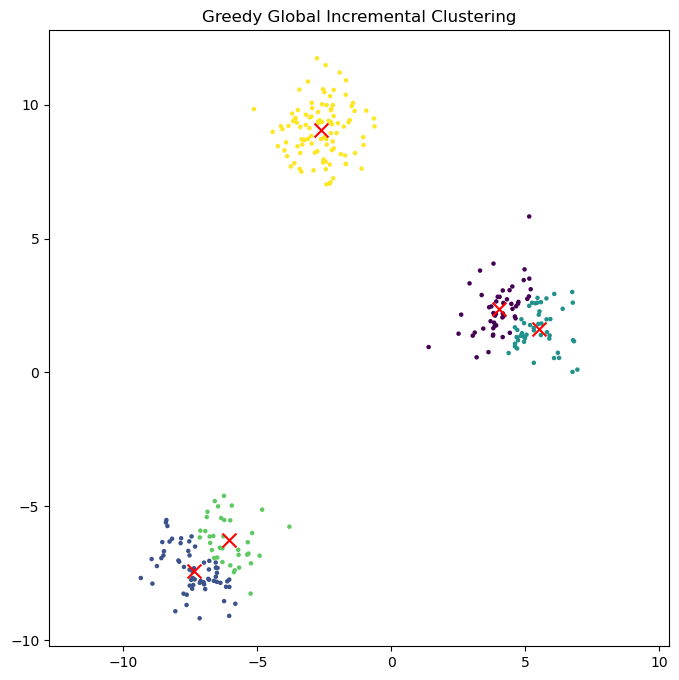

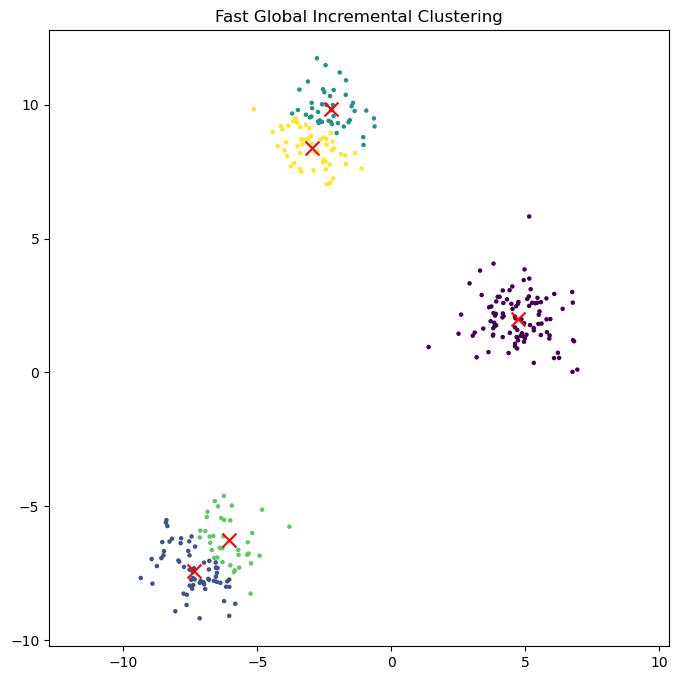

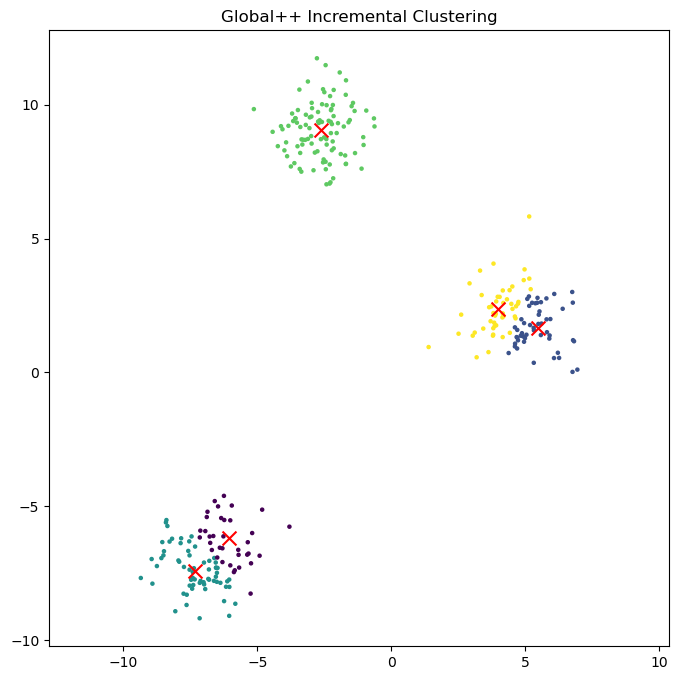

In [62]:
# (a) Implement the three versions
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def greedy_global_incremental(X, k_f):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

def fast_global_incremental(X, k_star):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            # Assign points to nearest centroid without full k-means iterations
            labels = np.argmin(cdist(X, np.array(trial_centroids)), axis=1)
            # 
            new_centroids = []
            for j in range(k):
                if np.any(labels == j):
                    new_centroids.append(X[labels == j].mean(axis=0))
                else:
                    new_centroids.append(trial_centroids[j])  # 
            error = np.sum((X - np.array(new_centroids)[labels]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

def global_plus_plus(X, k_f, m_ratio=0.1):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        dists = np.min(cdist(X, np.array(centroids)), axis=1)
        prob = dists / np.sum(dists)
        m = int(np.floor(m_ratio * n_samples))
        candidate_indices = np.random.choice(n_samples, size=m, replace=False, p=prob)
        best_error = float('inf')
        best_centroid = None
        for i in candidate_indices:
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Plot the KMeans results (with centroids)
def plot_kmeans(kmeans, X, n_clusters=4, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)

    # Plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    for c in centers:
        ax.scatter(c[0], c[1], c='red', marker='x', s=100, zorder=3)  # Mark cluster centers

# Example usage
if __name__ == "__main__":
    # Generate a synthetic dataset
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    k_f = 5  # Target number of clusters

    # Apply Greedy Global Incremental and plot the result
    centroids_greedy = greedy_global_incremental(X, k_f)
    kmeans_greedy = KMeans(n_clusters=k_f, init=centroids_greedy, n_init=1, max_iter=300)
    plt.figure(figsize=(8, 8))
    plot_kmeans(kmeans_greedy, X, n_clusters=k_f)
    plt.title("Greedy Global Incremental Clustering")
    plt.show()

    # Apply Fast Global Incremental and plot the result
    centroids_fast = fast_global_incremental(X, k_f)
    kmeans_fast = KMeans(n_clusters=k_f, init=centroids_fast, n_init=1, max_iter=300)
    plt.figure(figsize=(8, 8))
    plot_kmeans(kmeans_fast, X, n_clusters=k_f)
    plt.title("Fast Global Incremental Clustering")
    plt.show()

    # Apply Global++ Incremental and plot the result
    centroids_globalplus = global_plus_plus(X, k_f)
    kmeans_globalplus = KMeans(n_clusters=k_f, init=centroids_globalplus, n_init=1, max_iter=300)
    plt.figure(figsize=(8, 8))
    plot_kmeans(kmeans_globalplus, X, n_clusters=k_f)
    plt.title("Global++ Incremental Clustering")
    plt.show()

In [ ]:
# b

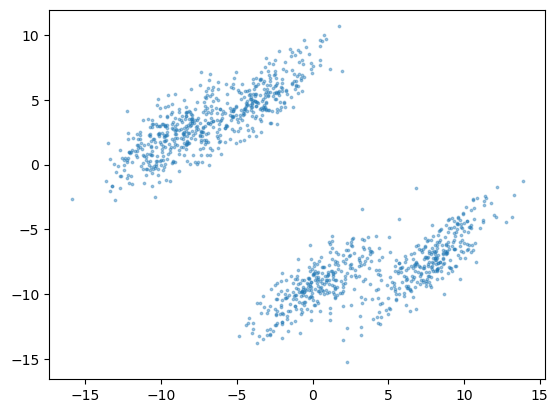

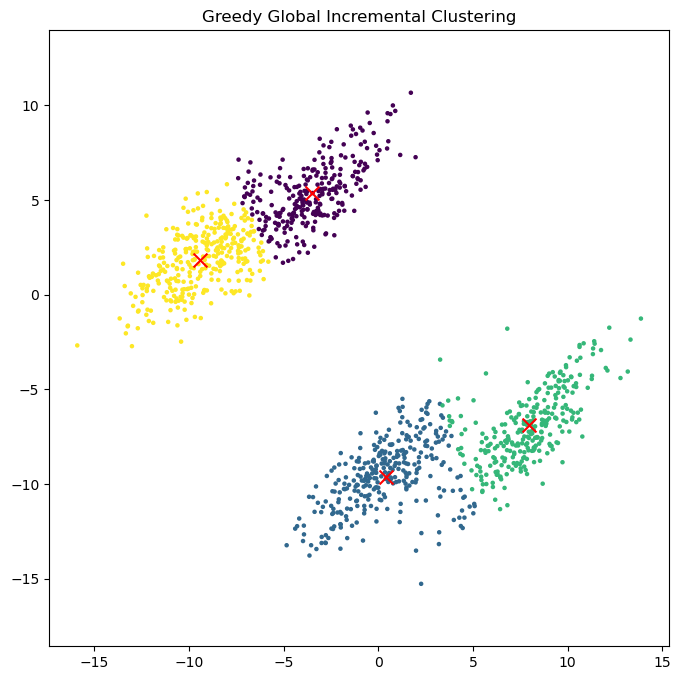

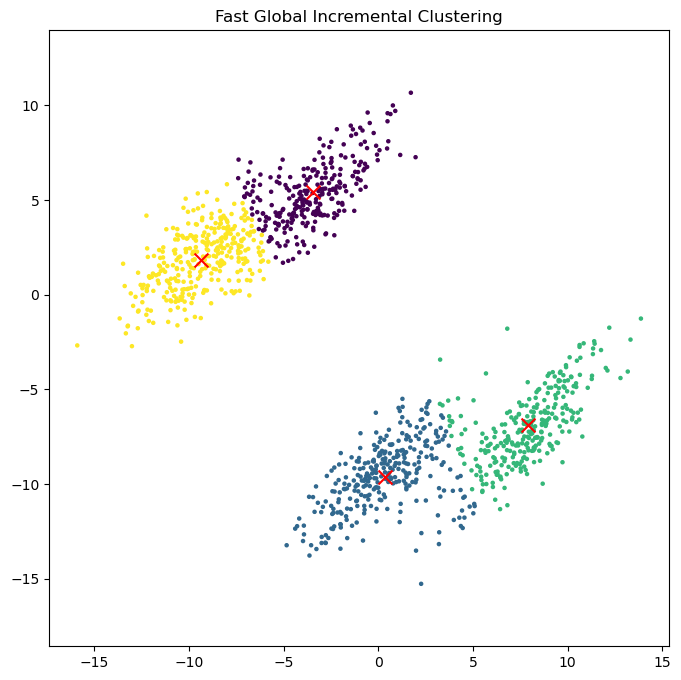

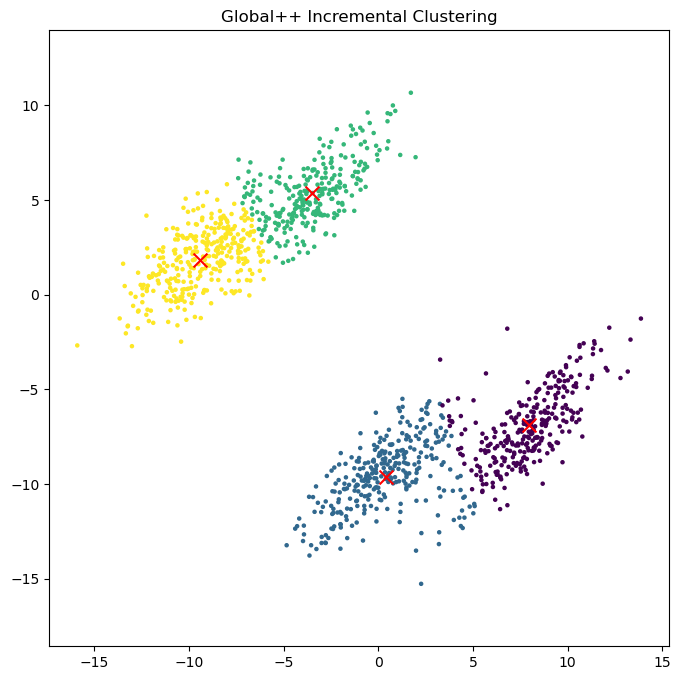

In [60]:
# (c) Color clustering using the data from lab5
import numpy as np
from numpy import random
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic 2D data using a Gaussian Mixture Model
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    x = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x  

# Greedy Global Incremental
def greedy_global_incremental(X, k_f):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Fast Global Incremental
def fast_global_incremental(X, k_f):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            labels = np.argmin(cdist(X, np.array(trial_centroids)), axis=1)
            new_centroids = []
            for j in range(k):
                if np.any(labels == j):
                    new_centroids.append(X[labels == j].mean(axis=0))
                else:
                    new_centroids.append(trial_centroids[j])  # Keep the previous centroid if no points assigned
            error = np.sum((X - np.array(new_centroids)[labels]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Global++ Incremental
def global_plus_plus(X, k_f, m_ratio=0.1):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        dists = np.min(cdist(X, np.array(centroids)), axis=1)
        prob = dists / np.sum(dists)
        m = int(np.floor(m_ratio * n_samples))
        candidate_indices = np.random.choice(n_samples, size=m, replace=False, p=prob)
        best_error = float('inf')
        best_centroid = None
        for i in candidate_indices:
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Plot the KMeans results (without gray circles)
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)

    # Plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    for c in centers:
        ax.scatter(c[0], c[1], c='red', marker='x', s=100, zorder=3)  # Mark cluster centers

# Generate synthetic 2D data with 4 clusters
X = gen_data(k=4, dim=2, points_per_cluster=300)

# Apply Greedy Global Incremental and plot the result
centroids_greedy = greedy_global_incremental(X, k_f=4)
kmeans_greedy = KMeans(n_clusters=4, init=centroids_greedy, n_init=1, max_iter=300)
plt.figure(figsize=(8, 8))
plot_kmeans(kmeans_greedy, X, n_clusters=4)
plt.title("Greedy Global Incremental Clustering")
plt.show()

# Apply Fast Global Incremental and plot the result
centroids_fast = fast_global_incremental(X, k_f=4)
kmeans_fast = KMeans(n_clusters=4, init=centroids_fast, n_init=1, max_iter=300)
plt.figure(figsize=(8, 8))
plot_kmeans(kmeans_fast, X, n_clusters=4)
plt.title("Fast Global Incremental Clustering")
plt.show()

# Apply Global++ Incremental and plot the result
centroids_globalplus = global_plus_plus(X, k_f=4)
kmeans_globalplus = KMeans(n_clusters=4, init=centroids_globalplus, n_init=1, max_iter=300)
plt.figure(figsize=(8, 8))
plot_kmeans(kmeans_globalplus, X, n_clusters=4)
plt.title("Global++ Incremental Clustering")
plt.show()


Running experiments for sigma = 0.1


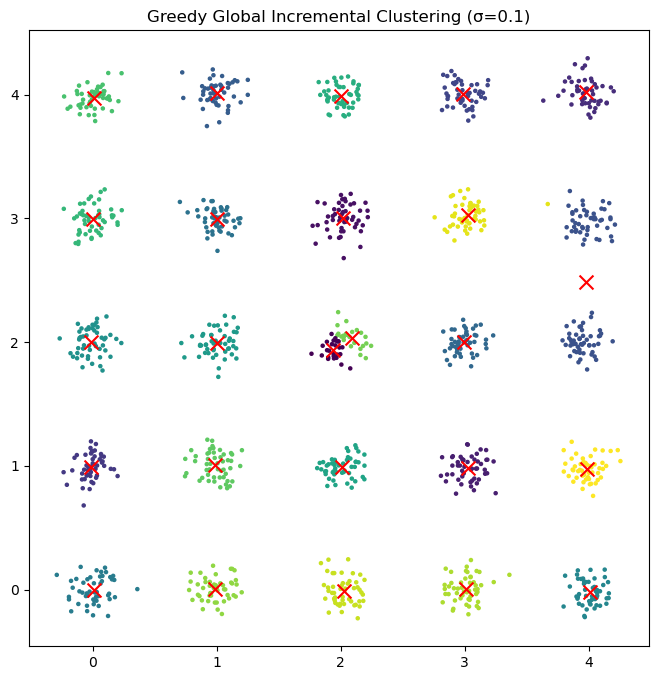

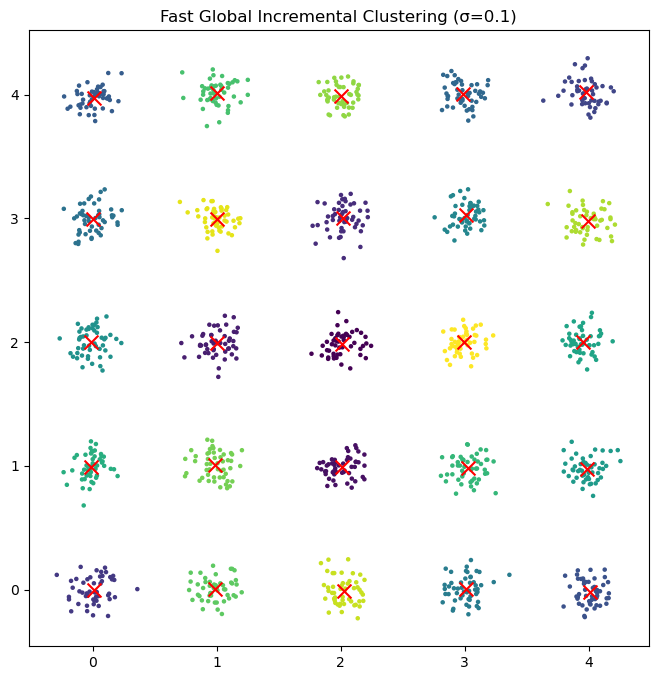

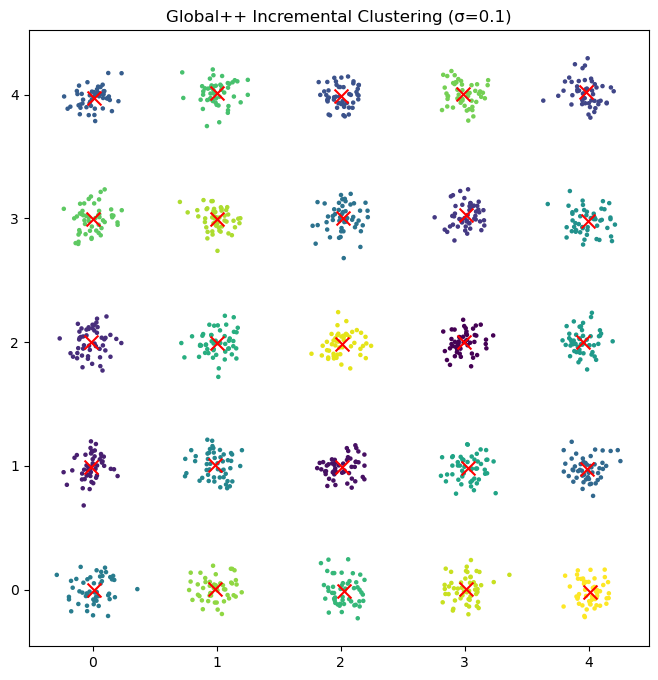

Running experiments for sigma = 0.5


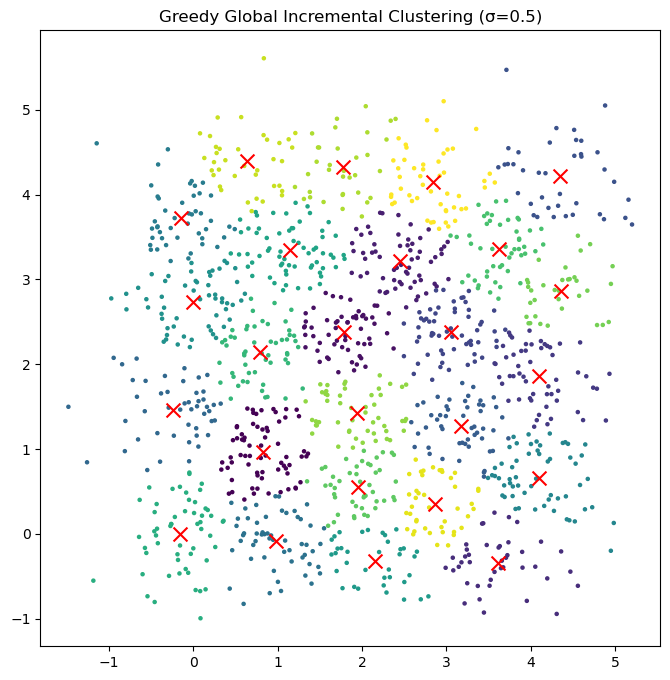

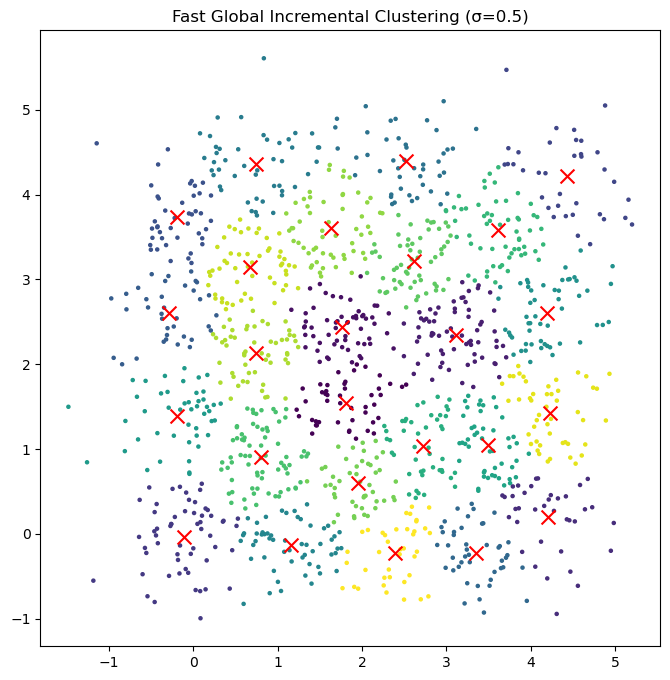

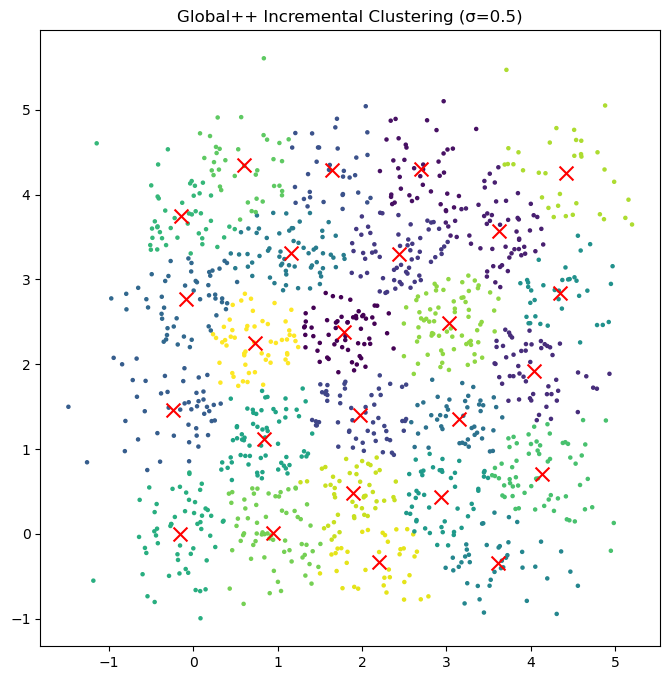

Running experiments for sigma = 0.7


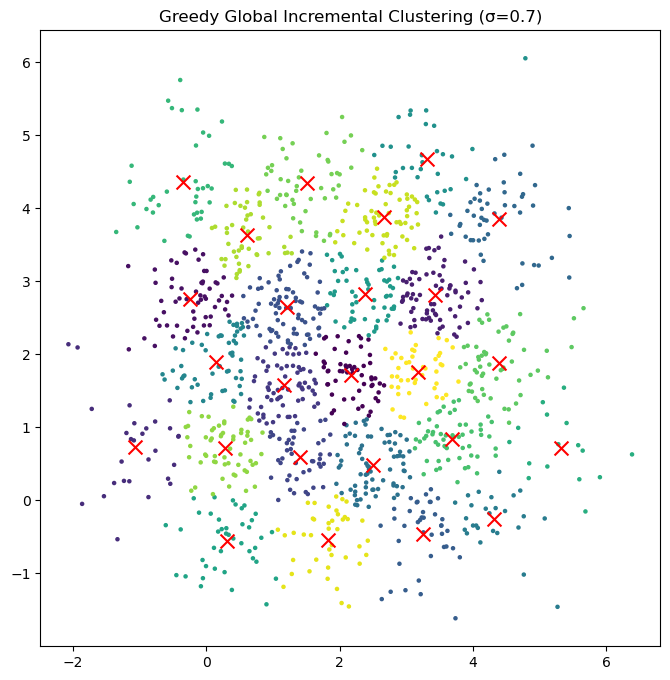

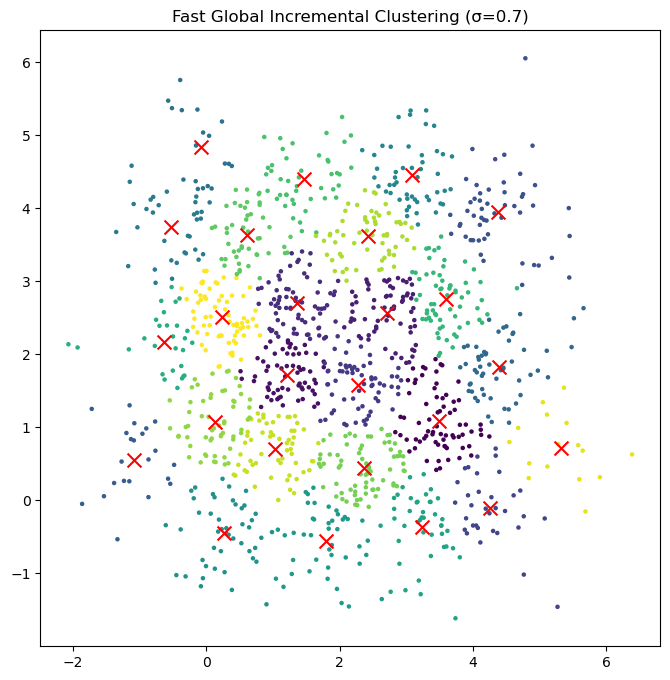

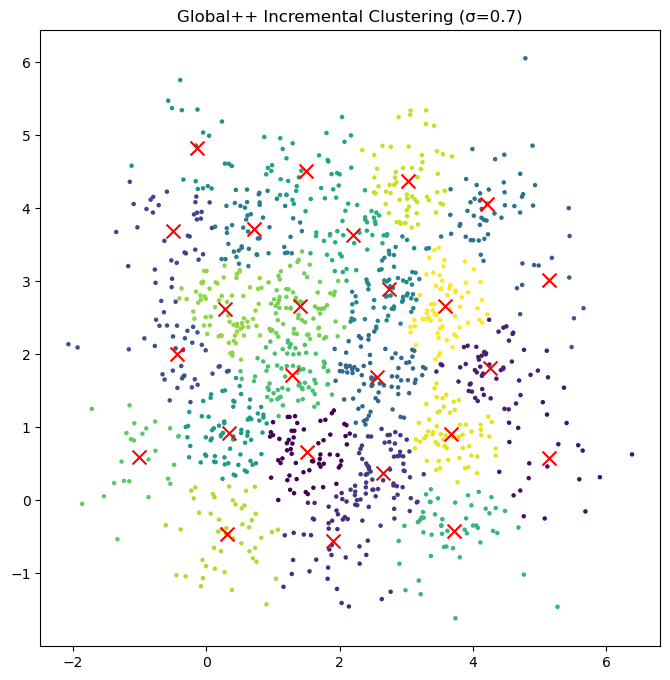

Running experiments for sigma = 1


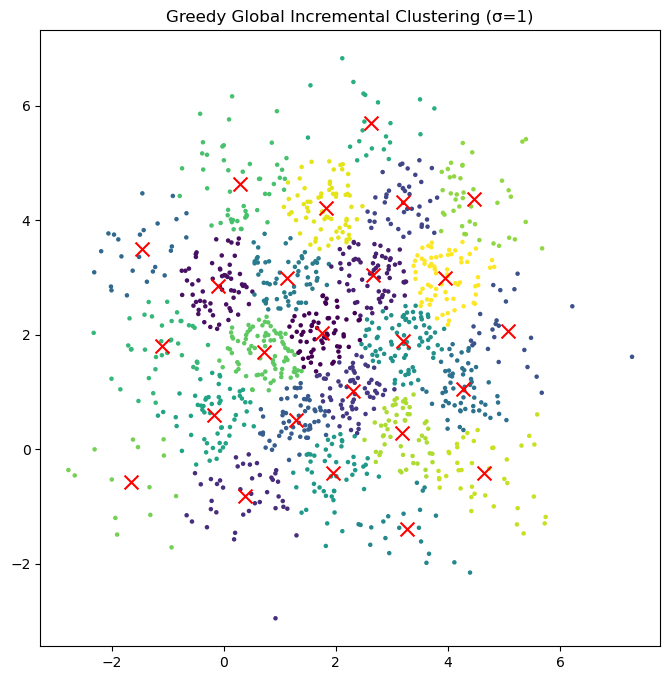

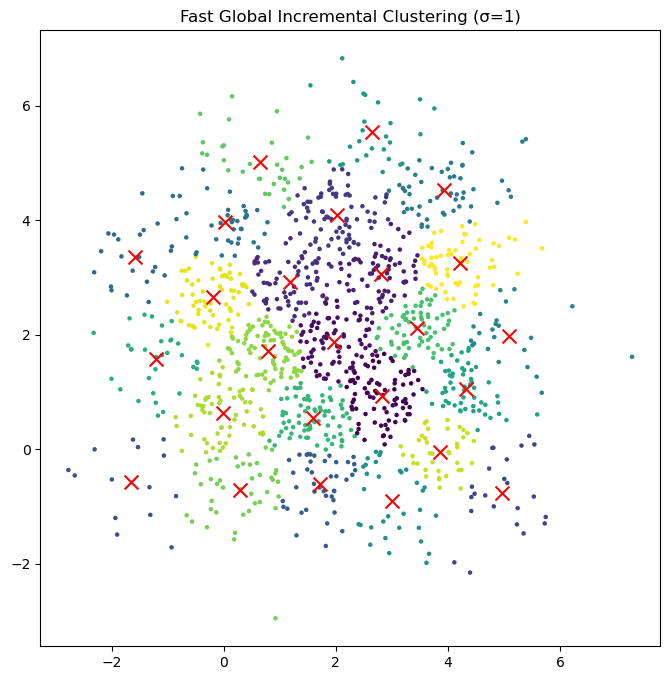

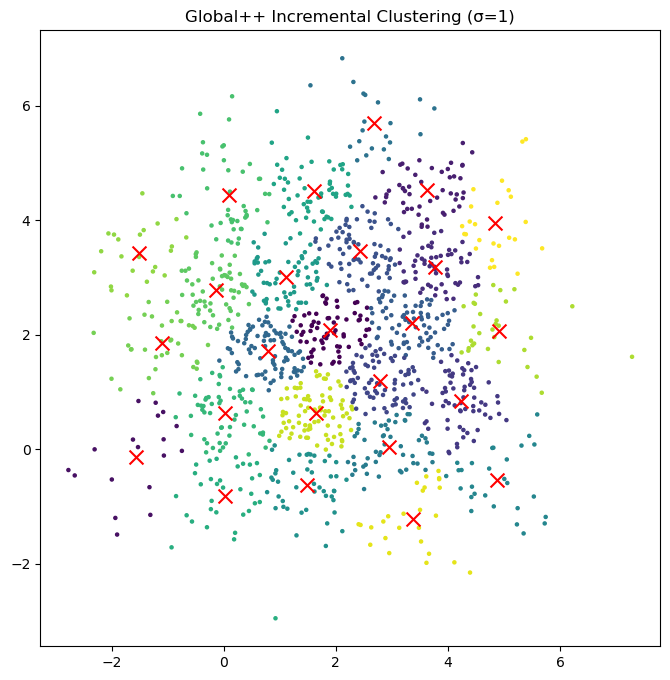

In [64]:
# (d) Implement with random synthetic dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Generate synthetic 2D dataset with a 5x5 grid
def generate_grid_data(sigma, n_clusters=25, points_per_cluster=50):
    grid_size = 5  # 5x5 grid of clusters
    grid = np.array([(i, j) for i in range(grid_size) for j in range(grid_size)])  # 5x5 grid of means
    X = []
    for i in range(n_clusters):
        mean = grid[i]
        cov = np.array([[sigma**2, 0], [0, sigma**2]])  # Covariance matrix for each cluster
        points = np.random.multivariate_normal(mean, cov, points_per_cluster)
        X.append(points)
    X = np.vstack(X)
    return X

# Greedy Global Incremental
def greedy_global_incremental(X, k_f):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Fast Global Incremental
def fast_global_incremental(X, k_f):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        best_error = float('inf')
        best_centroid = None
        for i in range(n_samples):
            trial_centroids = centroids + [X[i]]
            labels = np.argmin(cdist(X, np.array(trial_centroids)), axis=1)
            new_centroids = []
            for j in range(k):
                if np.any(labels == j):
                    new_centroids.append(X[labels == j].mean(axis=0))
                else:
                    new_centroids.append(trial_centroids[j])  # Keep the previous centroid if no points assigned
            error = np.sum((X - np.array(new_centroids)[labels]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Global++ Incremental
def global_plus_plus(X, k_f, m_ratio=0.1):
    n_samples, _ = X.shape
    centroids = [np.mean(X, axis=0)]  # Start with 1 cluster
    for k in range(2, k_f + 1):
        dists = np.min(cdist(X, np.array(centroids)), axis=1)
        prob = dists / np.sum(dists)
        m = int(np.floor(m_ratio * n_samples))
        candidate_indices = np.random.choice(n_samples, size=m, replace=False, p=prob)
        best_error = float('inf')
        best_centroid = None
        for i in candidate_indices:
            trial_centroids = centroids + [X[i]]
            kmeans = KMeans(n_clusters=k, init=np.array(trial_centroids), n_init=1, max_iter=300)
            kmeans.fit(X)
            error = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
            if error < best_error:
                best_error = error
                best_centroid = X[i]
        centroids.append(best_centroid)
    return np.array(centroids)

# Plotting function
def plot_clusters(X, k_f, centroids, title):
    kmeans = KMeans(n_clusters=k_f, init=centroids, n_init=1, max_iter=300)
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)
    centers = kmeans.cluster_centers_
    for c in centers:
        plt.scatter(c[0], c[1], c='red', marker='x', s=100, zorder=3)  # Mark cluster centers
    plt.title(title)
    plt.show()

# Generate synthetic 2D data with a 5x5 grid of clusters
sigma_values = [0.1, 0.5, 0.7, 1]
k_f = 25  # Target number of clusters

for sigma in sigma_values:
    print(f"Running experiments for sigma = {sigma}")
    X = generate_grid_data(sigma=sigma)

    # Apply Greedy Global Incremental and plot the result
    centroids_greedy = greedy_global_incremental(X, k_f)
    plot_clusters(X, k_f, centroids_greedy, f"Greedy Global Incremental Clustering (σ={sigma})")

    # Apply Fast Global Incremental and plot the result
    centroids_fast = fast_global_incremental(X, k_f)
    plot_clusters(X, k_f, centroids_fast, f"Fast Global Incremental Clustering (σ={sigma})")

    # Apply Global++ Incremental and plot the result
    centroids_globalplus = global_plus_plus(X, k_f)
    plot_clusters(X, k_f, centroids_globalplus, f"Global++ Incremental Clustering (σ={sigma})")


In [ ]:
# (e) GMM with EM
import numpy as np
from scipy.stats import multivariate_normal

def gmm_em(X, k, max_iter=100, tol=1e-6):
    n_samples, n_features = X.shape

    # Step 1: Initialize parameters
    np.random.seed(42)
    means = X[np.random.choice(n_samples, k, replace=False)]  # Random initialization of means
    covariances = [np.cov(X, rowvar=False)] * k              # Shared covariance initially
    weights = np.ones(k) / k                                 # Equal weights

    log_likelihood = 0
    responsibilities = np.zeros((n_samples, k))

    for iteration in range(max_iter):
        # E-step: Calculate responsibilities
        for i in range(k):
            responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step: Update parameters
        Nk = responsibilities.sum(axis=0)  # Sum of responsibilities for each component
        weights = Nk / n_samples           # Update weights

        for i in range(k):
            means[i] = (X * responsibilities[:, i, np.newaxis]).sum(axis=0) / Nk[i]  # Update means
            covariances[i] = (responsibilities[:, i, np.newaxis] * (X - means[i])).T @ (X - means[i]) / Nk[i]  # Update covariances

        # Calculate log-likelihood
        new_log_likelihood = np.sum(np.log(np.sum(responsibilities * weights, axis=1)))
        if np.abs(new_log_likelihood - log_likelihood) < tol:  # Check for convergence
            break
        log_likelihood = new_log_likelihood

    return means, covariances, weights, responsibilities


In [ ]:
# f

## Exercise 4 - [10%]

Given a dataset $X = \{x_1,...,x_N\}$, $x_i \in \mathbb{R}^d$ and a distance measure computed by the function $dist(x_i, x_j) : X \times X \mapsto \mathbb{R}$, one can define a procedure that *reweights* the distances as: 
$$
    dist'(x_i, x_j) = w_{ij} * dist(x_i, x_j)
$$
where $w_{ij} \in \mathbb{R}^+$. The aim is to bring datapoints that are related closer and to distanciate others that are less related. 

* **Kernels:** A typical low-level approach used is by employing a kernel, e.g. the RBF-kernel (radial basis function) 
    $$w_{ij} := 1 / (1+RBFkernel(x_i, x_j)) = 1 / (1 + \exp(-\gamma \Vert x_i - x_j \Vert^2_2))$$
where $\gamma = \frac{1}{2\sigma^2}$. 

* **Cluster-based:** Alternatively, cluster-based high-level approaches can be employed. The idea is that we could cluster the dataset and exploit its cluster structure to determine a better $w_{ij}$. 
    * Flat clustering (e.g. $k$-means): Generate one or more clustering results and compute the frequency the two datapoints $x_i$ and $x_j$ get clustered together. 
    * Hierarchical clustering (e.g. HAC or bisecting $k$-means): Given the learned cluster hierarchy, we could define the proximity between two datapoints $x_i$ and $x_j$ based on the depth in the hierarchy (let that be $h_{ij}$) at which they get separated. 
    * Incremental clustering (e.g. global $k$-means): (deliberately not explained how this would work).
    
For this exercise, you will need to: 

a) Implement the above concepts and approaches: the simple kernel-based approach, and the three cluster-based approaches. For the incremental clustering one, you will need to devise a way to build a meaningful measure.

b) Use generated synthetic data, like those in the previous exercise, to demonstrate the correctness of your implementation and the behavior of the approaches. 


== RBF Kernel ==
Original Distance:
 [[0.         0.1786471  0.14306129 0.20869372 0.53118409 0.30612356
  0.2112843  0.7891329  0.54148195 0.27670999]
 [0.1786471  0.         0.20562852 0.3842079  0.39536284 0.18963685
  0.38229325 0.70162138 0.64973151 0.36942074]
 [0.14306129 0.20562852 0.         0.2462733  0.60040816 0.38621822
  0.31477278 0.66072543 0.44455307 0.41940497]
 [0.20869372 0.3842079  0.2462733  0.         0.73154383 0.50704448
  0.13477076 0.8842009  0.42153982 0.34126404]
 [0.53118409 0.39536284 0.60040816 0.73154383 0.         0.2252094
  0.67115269 0.94052292 1.04491552 0.52073358]
 [0.30612356 0.18963685 0.38621822 0.50704448 0.2252094  0.
  0.45541762 0.84531028 0.82913891 0.34138697]
 [0.2112843  0.38229325 0.31477278 0.13477076 0.67115269 0.45541762
  0.         0.97470248 0.55566014 0.21734021]
 [0.7891329  0.70162138 0.66072543 0.8842009  0.94052292 0.84531028
  0.97470248 0.         0.74722058 1.05495271]
 [0.54148195 0.64973151 0.44455307 0.42153982 1.0449

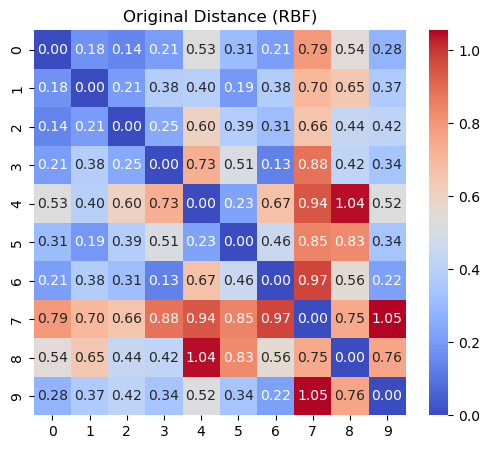

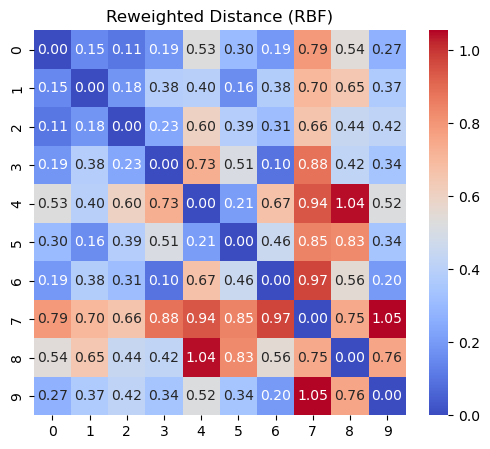

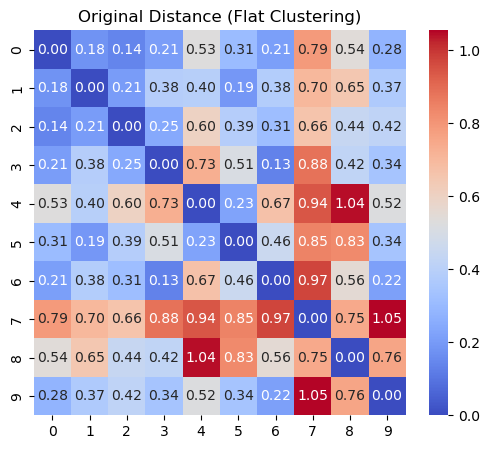

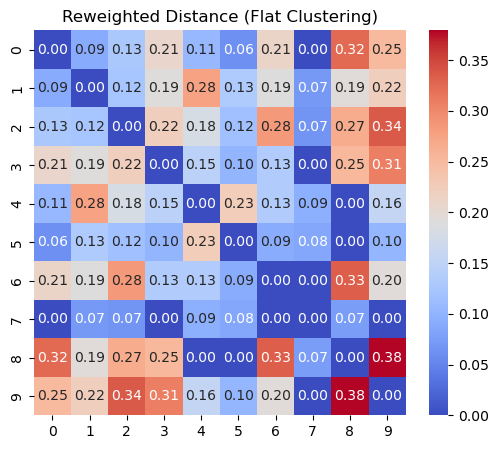

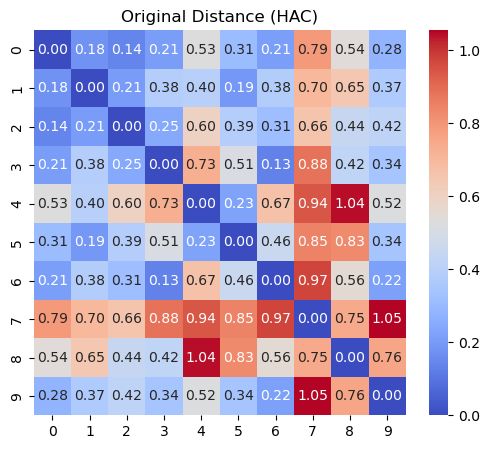

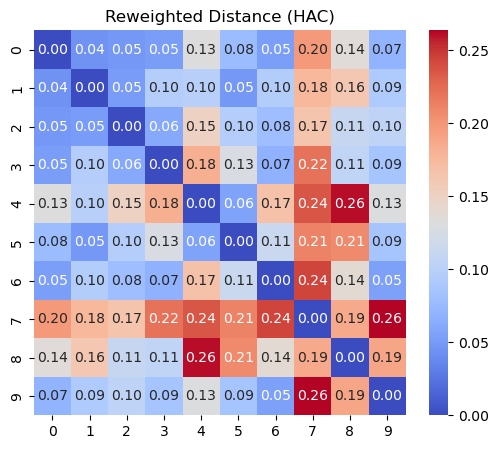

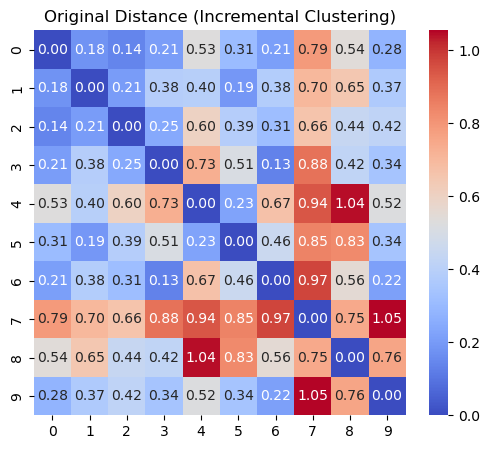

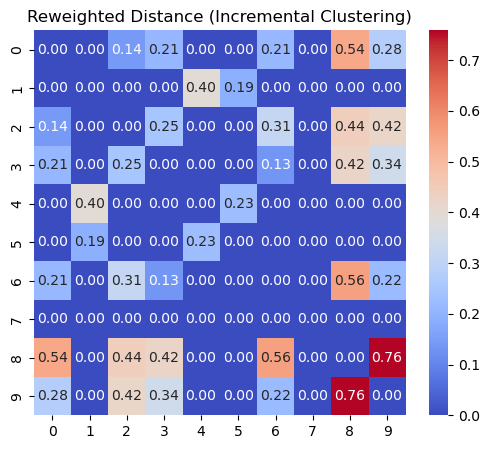

In [72]:
# (a) Implement approaches
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute RBF kernel weight matrix
def rbf_kernel_weight(X, sigma):
    D = euclidean_distances(X, X)  # Compute the Euclidean distance matrix

    gamma = 1 / (2 * sigma**2)  # Define the gamma parameter for RBF kernel
    
    # Compute the weight matrix using the RBF kernel function
    W = 1 / (1 + np.exp(-gamma * D**2))
    
    # Reweighted distance matrix by element-wise multiplication
    D_prime = W * D  
    return D, W, D_prime, gamma

# Function to compute flat clustering weights using KMeans
def flat_clustering_weight(X, n_clusters=3, n_runs=10):
    N = X.shape[0]
    co_occurrence_matrix = np.zeros((N, N))  # Initialize the co-occurrence matrix
    
    # Run KMeans clustering multiple times
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(X)
        labels = kmeans.labels_
        
        # Update the co-occurrence matrix based on labels
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    co_occurrence_matrix[i, j] += 1

    W = co_occurrence_matrix / n_runs  # Normalize co-occurrence matrix
    D = euclidean_distances(X, X)  # Compute the Euclidean distance matrix
    D_prime = W * D  # Reweight the distance matrix using co-occurrence matrix
    return D, W, D_prime

# Function to compute hierarchical clustering weights
def hierarchical_clustering_weight(X, method='single'):
    N = X.shape[0]
    
    # Perform hierarchical clustering using the specified method
    Z = linkage(X, method=method)  
    dendro = dendrogram(Z, no_plot=True)
    leaves_order = dendro['leaves']  # Order of the leaves in the dendrogram
    
    # Initialize a depth matrix
    depth_matrix = np.zeros((N, N))
    
    # Compute the depth matrix by calculating the clustering depth
    for i in range(len(Z)):
        cluster1 = int(Z[i, 0])
        cluster2 = int(Z[i, 1])
        depth = i + 1
        if cluster1 < N and cluster2 < N:  # If both clusters are leaves
            depth_matrix[cluster1, cluster2] = depth
            depth_matrix[cluster2, cluster1] = depth
        else:  # If one or both clusters are non-leaves
            for leaf1 in leaves_order:
                for leaf2 in leaves_order:
                    if leaf1 == leaf2:
                        continue
                    if depth_matrix[leaf1, leaf2] == 0:
                        depth_matrix[leaf1, leaf2] = depth
                        depth_matrix[leaf2, leaf1] = depth

    W = 1 / (1 + depth_matrix)  # Weight matrix based on depth
    D = euclidean_distances(X, X)  # Compute the Euclidean distance matrix
    D_prime = W * D  # Reweight the distance matrix using depth-based weights
    return D, W, D_prime

# Function to compute incremental clustering weights using MiniBatchKMeans
def incremental_clustering_weight(X, n_clusters=3, batch_size=5, n_iterations=10):
    N = X.shape[0]
    co_occurrence_matrix = np.zeros((N, N))  # Initialize co-occurrence matrix
    
    # MiniBatchKMeans for incremental clustering
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=None)
    
    # Incrementally fit the model for a specified number of iterations
    for i in range(n_iterations):
        minibatch_kmeans.partial_fit(X)  # Incrementally fit on data
        labels = minibatch_kmeans.labels_
        
        # Update the co-occurrence matrix based on the current labels
        for i in range(N):
            for j in range(N):
                if labels[i] == labels[j]:
                    co_occurrence_matrix[i, j] += 1
    
    W = co_occurrence_matrix / n_iterations  # Normalize the co-occurrence matrix
    D = euclidean_distances(X, X)  # Compute the Euclidean distance matrix
    D_prime = W * D  # Reweight the distance matrix using co-occurrence matrix
    return D, W, D_prime

# Data generation
np.random.seed(0)
X = np.random.rand(10, 2)  # Generate random data points
sigma = 0.1  # Set sigma for RBF kernel

# Compute the weights and reweighted distance matrices for RBF kernel
D_rbf, W_rbf, D_prime_rbf, gamma = rbf_kernel_weight(X, sigma)

n_clusters = 3  # Number of clusters for flat clustering
n_runs = 10  # Number of runs for flat clustering
# Compute the weights and reweighted distance matrices for flat clustering
D_flat, W_flat, D_prime_flat = flat_clustering_weight(X, n_clusters, n_runs)

method = 'single'  # Method for hierarchical clustering
# Compute the weights and reweighted distance matrices for hierarchical clustering
D_hier, W_hier, D_prime_hier = hierarchical_clustering_weight(X, method)

# Compute the weights and reweighted distance matrices for incremental clustering
D_incremental, W_incremental, D_prime_incremental = incremental_clustering_weight(X, n_clusters=3, batch_size=5, n_iterations=10)

# Print results for each method
print("== RBF Kernel ==")
print("Original Distance:\n", D_rbf)
print("Weights:\n", W_rbf)
print("Reweighted Distance:\n", D_prime_rbf)

print("\n== Flat Clustering ==")
print("Original Distance:\n", D_flat)
print("Weights:\n", W_flat)
print("Reweighted Distance:\n", D_prime_flat)

print("\n== Hierarchical Clustering ==")
print("Original Distance:\n", D_hier)
print("Weights:\n", W_hier)
print("Reweighted Distance:\n", D_prime_hier)

print("\n== Incremental Clustering (Global K-means) ==")
print("Original Distance:\n", D_incremental)
print("Weights:\n", W_incremental)
print("Reweighted Distance:\n", D_prime_incremental)

# Plotting function to visualize the distance matrices
def plot_distance_matrix(D, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(D, annot=True, fmt=".2f", cmap="coolwarm")  # Create a heatmap
    plt.title(title)  # Title of the plot
    plt.show()

# Plot distance matrices for each clustering method
plot_distance_matrix(D_rbf, "Original Distance (RBF)")
plot_distance_matrix(D_prime_rbf, "Reweighted Distance (RBF)")

plot_distance_matrix(D_flat, "Original Distance (Flat Clustering)")
plot_distance_matrix(D_prime_flat, "Reweighted Distance (Flat Clustering)")

plot_distance_matrix(D_hier, "Original Distance (HAC)")
plot_distance_matrix(D_prime_hier, "Reweighted Distance (HAC)")

plot_distance_matrix(D_incremental, "Original Distance (Incremental Clustering)")
plot_distance_matrix(D_prime_incremental, "Reweighted Distance (Incremental Clustering)")


In [ ]:
# (b) check correctness